In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ALMABETTER PROJECT/Fraud.csv')
#shape the data
df.shape

(6362620, 11)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Data analysis

size, columns and datatypes



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Fraud and flagged fraud

In [ ]:
print('Number of fraudulent transactions \t: {}'.format(df['isFraud'].sum()))
print('Number of non-fraudulent transactions \t: {}'.format(len(df[df['isFraud']==0])))
print('\nNumber of transactions flagged fraud \t: {}'.format(len(df[df['isFlaggedFraud']==1])))
print('Number of transactions flagged non-fraud: {}'.format(len(df[df['isFlaggedFraud']==0])))

Number of fraudulent transactions 	: 8213
Number of non-fraudulent transactions 	: 6354407

Number of transactions flagged fraud 	: 16
Number of transactions flagged non-fraud: 6362604


In [ ]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [ ]:
fraud_ratio = df['isFraud'].value_counts()/len(df)
flaggedFraud_ratio =  df['isFlaggedFraud'].value_counts()/len(df)

In [ ]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')


Fraud ratio 
isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64 

Flagged fraud ratio 
isFlaggedFraud
0    0.999997
1    0.000003
Name: count, dtype: float64


In [ ]:
df['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
fraudby_type = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
flaggedFraudby_type = df[df['isFlaggedFraud']==1].groupby('type')['isFlaggedFraud'].count()

In [ ]:
print(f'Fraud per transaction type: \n{fraudby_type}\n \nFlagged fraud per transaction type: \n{flaggedFraudby_type}')


Fraud per transaction type: 
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097
 
Flagged fraud per transaction type: 
type
TRANSFER    16
Name: isFlaggedFraud, dtype: int64


In [ ]:
df[df['isFraud']==1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


In [ ]:
len(df[(df['amount'] == df['oldbalanceOrg'])])

8034

In [ ]:
len(df[(df['amount'] == df['oldbalanceOrg']) & (df['isFraud'] == 1)] )

8034

In [ ]:
df_outliers = df[(df['amount'] != df['oldbalanceOrg']) & (df['isFraud'] == 1)]


In [ ]:
df_outliers.groupby('type')['type'].count()


type
CASH_OUT     25
TRANSFER    154
Name: type, dtype: int64

In [ ]:
df_outliers[df_outliers['type'] == 'CASH_OUT'].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,25.000000,25.000000,25.000000,25.0000,2.500000e+01,2.500000e+01,25.0,25.0
mean,56.880000,220121.416800,17031.663200,11950.7044,5.806669e+05,1.185674e+06,1.0,0.0
std,78.015127,158136.453984,69138.559766,59753.5220,1.613350e+06,2.341533e+06,0.0,0.0
min,1.000000,23292.300000,0.000000,0.0000,0.000000e+00,4.061122e+04,1.0,0.0
25%,13.000000,95428.320000,0.000000,0.0000,0.000000e+00,2.250277e+05,1.0,0.0
50%,19.000000,181728.110000,0.000000,0.0000,1.139700e+04,4.070058e+05,1.0,0.0
75%,38.000000,314251.580000,0.000000,0.0000,3.989313e+05,6.784196e+05,1.0,0.0
max,231.000000,577418.980000,340830.430000,298767.6100,7.962205e+06,9.291620e+06,1.0,0.0


In [ ]:
df_outliers[df_outliers['type'] == 'TRANSFER'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,154.0,154.000000
mean,439.097403,9.565122e+06,1.928838e+07,1.006063e+07,2.855618e+04,5.909128e+04,1.0,0.038961
std,213.665941,1.919552e+06,1.081729e+07,1.032873e+07,2.048429e+05,3.562933e+05,0.0,0.194133
min,4.000000,1.231949e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,271.500000,1.000000e+07,1.227122e+07,2.455224e+06,0.000000e+00,0.000000e+00,1.0,0.000000
50%,425.000000,1.000000e+07,1.595579e+07,6.359678e+06,0.000000e+00,0.000000e+00,1.0,0.000000
75%,646.000000,1.000000e+07,2.370846e+07,1.493847e+07,0.000000e+00,0.000000e+00,1.0,0.000000
max,741.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.122337e+06,3.217684e+06,1.0,1.000000


### Flagged fraud

An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Analyzing flagged fraud data

In [ ]:
df[df['isFlaggedFraud'] == 1].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


In [ ]:
len(df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') ])

21

In [ ]:
len(df[df['isFlaggedFraud'] == 1])


16

In [ ]:
dff_outliers = df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') \
       & (df['isFlaggedFraud']==0)]
dff_outliers.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.00000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0
mean,16.80000,237475.474000,0.0,0.0,0.0,0.0,0.0,0.0
std,16.11521,161578.156092,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,18931.590000,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.00000,133711.480000,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.00000,271161.740000,0.0,0.0,0.0,0.0,0.0,0.0
75%,15.00000,342317.150000,0.0,0.0,0.0,0.0,0.0,0.0
max,44.00000,421255.410000,0.0,0.0,0.0,0.0,0.0,0.0


### Merchant transactions

Given, there is not information for customers that start with M (Merchants).

Finding transactions initiated by merchants

In [ ]:
df[df['nameOrig'].str.startswith('M')].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['nameDest'].str.startswith('M')].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,0.0,0.0,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,0.0,0.0,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,0.0,0.0,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,0.0,0.0,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,0.0,0.0,0.0,0.0


In [ ]:
df_missing = df[df['nameDest'].str.startswith('M')]


In [ ]:
df_missing['type'].unique()

array(['PAYMENT'], dtype=object)

### Data preprocessing

### Fix missing data

In [ ]:
import numpy as np
df.loc[df['nameDest'].str.startswith('M'), ['oldbalanceDest']] = np.NaN
print('{} rows updated with NaN'.format(df['oldbalanceDest'].isnull().sum()))


2151495 rows updated with NaN


In [ ]:
df=df.interpolate()

In [ ]:
df[df['oldbalanceDest'].isnull()]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,NaN,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,NaN,0.0,0,0


In [ ]:
df.loc[df['oldbalanceDest'].isnull(), 'oldbalanceDest'] = 0


In [ ]:
df.isnull().values.any()


False

In [ ]:
df[(df['type']=='PAYMENT') & (df.nameDest.str.get(0) != 'M')]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
newbalanceDest = df.loc[df.nameDest.str.get(0) == 'M', 'oldbalanceDest'] + df.loc[df.nameDest.str.get(0) == 'M','amount']


In [ ]:
df.loc[df['nameDest'].str.get(0) == 'M', ['newbalanceDest']] = newbalanceDest


In [ ]:
len(df[(df['nameDest'].str.get(0) == 'M') & (df['amount'] == df['oldbalanceOrg'])])


0

In [ ]:
df[df['nameDest'].str.get(0) == 'M'].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,1.161337e+06,1.174395e+06,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,2.614824e+06,2.614912e+06,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,1.105357e+05,1.240366e+05,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,4.304567e+05,4.436661e+05,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,1.266756e+06,1.279647e+06,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,3.368401e+08,3.368669e+08,0.0,0.0


In [ ]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.493403e+06,1.622113e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.647435e+06,3.891930e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,1.271562e+05,1.814925e+05,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,5.065537e+05,5.929597e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,1.533432e+06,1.678439e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Remove unwanted


In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


### Normalization


In [ ]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.493403e+06,1.622113e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.647435e+06,3.891930e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,1.271562e+05,1.814925e+05,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,5.065537e+05,5.929597e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,1.533432e+06,1.678439e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df['step'] = df['step'] - df['step'].mean() / (df['step'].std())
df[cols] = df[cols].apply(lambda x: (np.log(x+10)))

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-0.710067,PAYMENT,9.195190,12.044412,11.984842,2.302585,9.195190,0,0
1,-0.710067,PAYMENT,7.535980,9.964536,9.872756,2.302585,7.535980,0,0
2,-0.710067,TRANSFER,5.252273,5.252273,2.302585,2.302585,2.302585,1,0
3,-0.710067,CASH_OUT,5.252273,5.252273,2.302585,9.961379,2.302585,1,0
4,-0.710067,PAYMENT,9.365474,10.634990,10.305475,10.112316,10.499926,0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.416872e+02,1.084252e+01,8.178673e+00,6.672674e+00,1.205322e+01,1.275373e+01,1.290820e-03,2.514687e-06
std,1.423320e+02,1.809876e+00,4.691891e+00,5.229820e+00,3.762009e+00,2.795486e+00,3.590480e-02,1.585775e-03
min,-7.100673e-01,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.000000e+00
25%,1.542899e+02,9.502978e+00,2.302585e+00,2.302585e+00,1.175325e+01,1.210902e+01,0.000000e+00,0.000000e+00
50%,2.372899e+02,1.122367e+01,9.562264e+00,2.302585e+00,1.313541e+01,1.329290e+01,0.000000e+00,0.000000e+00
75%,3.332899e+02,1.224880e+01,1.158362e+01,1.187943e+01,1.424303e+01,1.433338e+01,0.000000e+00,0.000000e+00
max,7.412899e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


In [ ]:
df2 = df[(df['type'].isin(['CASH_OUT', 'TRANSFER']))].copy(deep=True)


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 211.4+ MB


In [ ]:
df2['step'] = df2['step'] - df2['step'].mean() / (df2['step'].std())


In [ ]:
df2.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.386012e+02,1.192809e+01,6.367012e+00,3.169231e+00,1.188522e+01,1.355135e+01,2.964544e-03,5.775321e-06
std,1.416191e+02,1.231621e+00,4.114653e+00,2.662251e+00,4.150795e+00,1.651896e+00,5.436687e-02,2.403183e-03
min,-2.406858e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.000000e+00
25%,1.515931e+02,1.132640e+01,2.302585e+00,2.302585e+00,1.176044e+01,1.269863e+01,0.000000e+00,0.000000e+00
50%,2.325931e+02,1.205100e+01,5.749266e+00,2.302585e+00,1.322802e+01,1.362685e+01,0.000000e+00,0.000000e+00
75%,3.285931e+02,1.263396e+01,1.034197e+01,2.302585e+00,1.436704e+01,1.456797e+01,0.000000e+00,0.000000e+00
max,7.395931e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


### Data visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


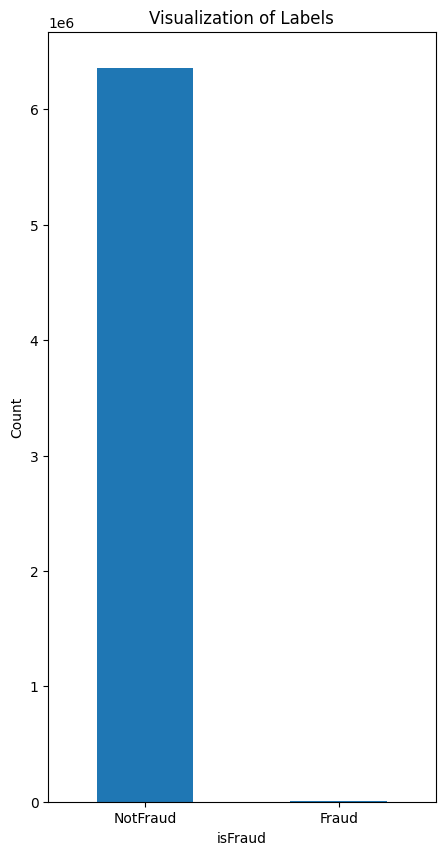

In [ ]:
plt.figure(figsize=(5,10))
labels = ["NotFraud", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

<ipython-input-55-33faf8d1bdcc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.step, fit=norm)
<ipython-input-55-33faf8d1bdcc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.step, fit=norm, color='y')


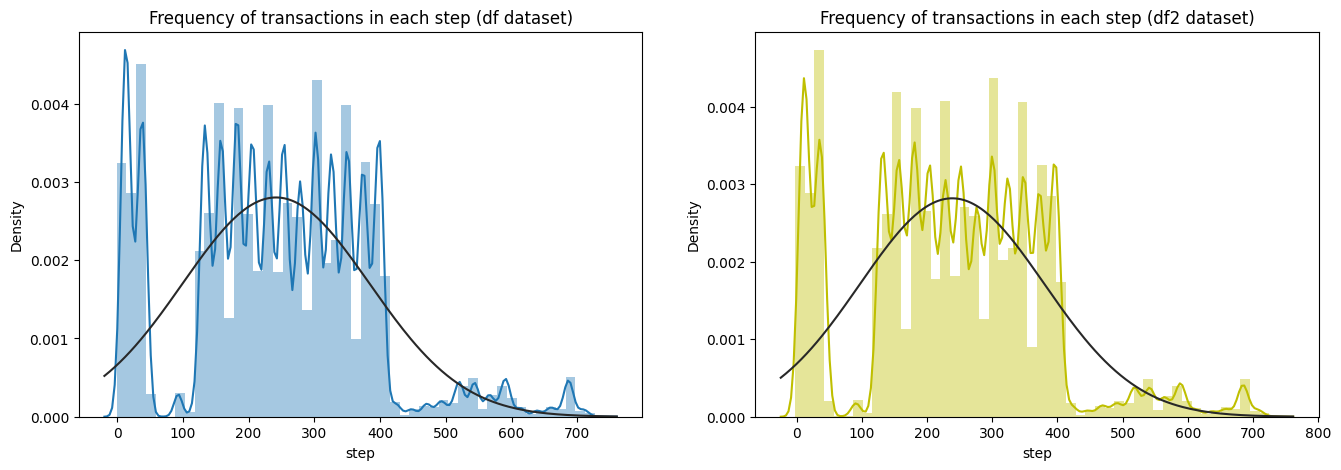

In [ ]:
plt.rcParams['figure.figsize'] =(16, 5)

plt.subplot(1, 2, 1)
sns.distplot(df.step, fit=norm)
plt.title('Frequency of transactions in each step (df dataset)', fontsize = 12)

plt.subplot(1, 2, 2)
sns.distplot(df2.step, fit=norm, color='y')
plt.title('Frequency of transactions in each step (df2 dataset)', fontsize = 12)

plt.show()

<ipython-input-56-ad3f29defa7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
<ipython-input-56-ad3f29defa7b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
<ipython-input-56-ad3f29defa7b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud',y='step',data=df2, palette='Pastel2')
<ipython-input-56-ad3f29defa7b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

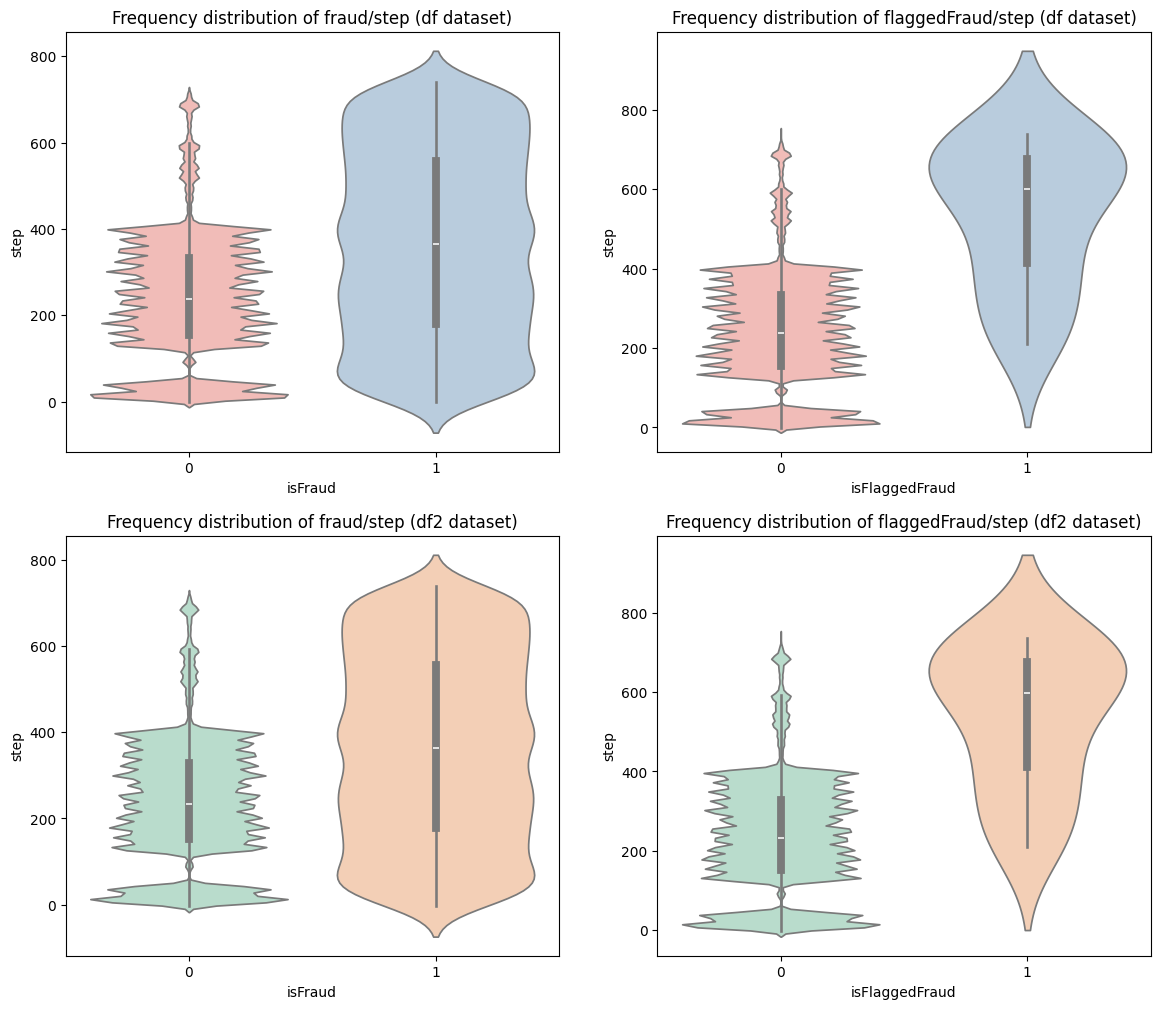

In [ ]:
plt.rcParams['figure.figsize'] =(14, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of flaggedFraud/step (df2 dataset)', fontsize = 12)

plt.show()

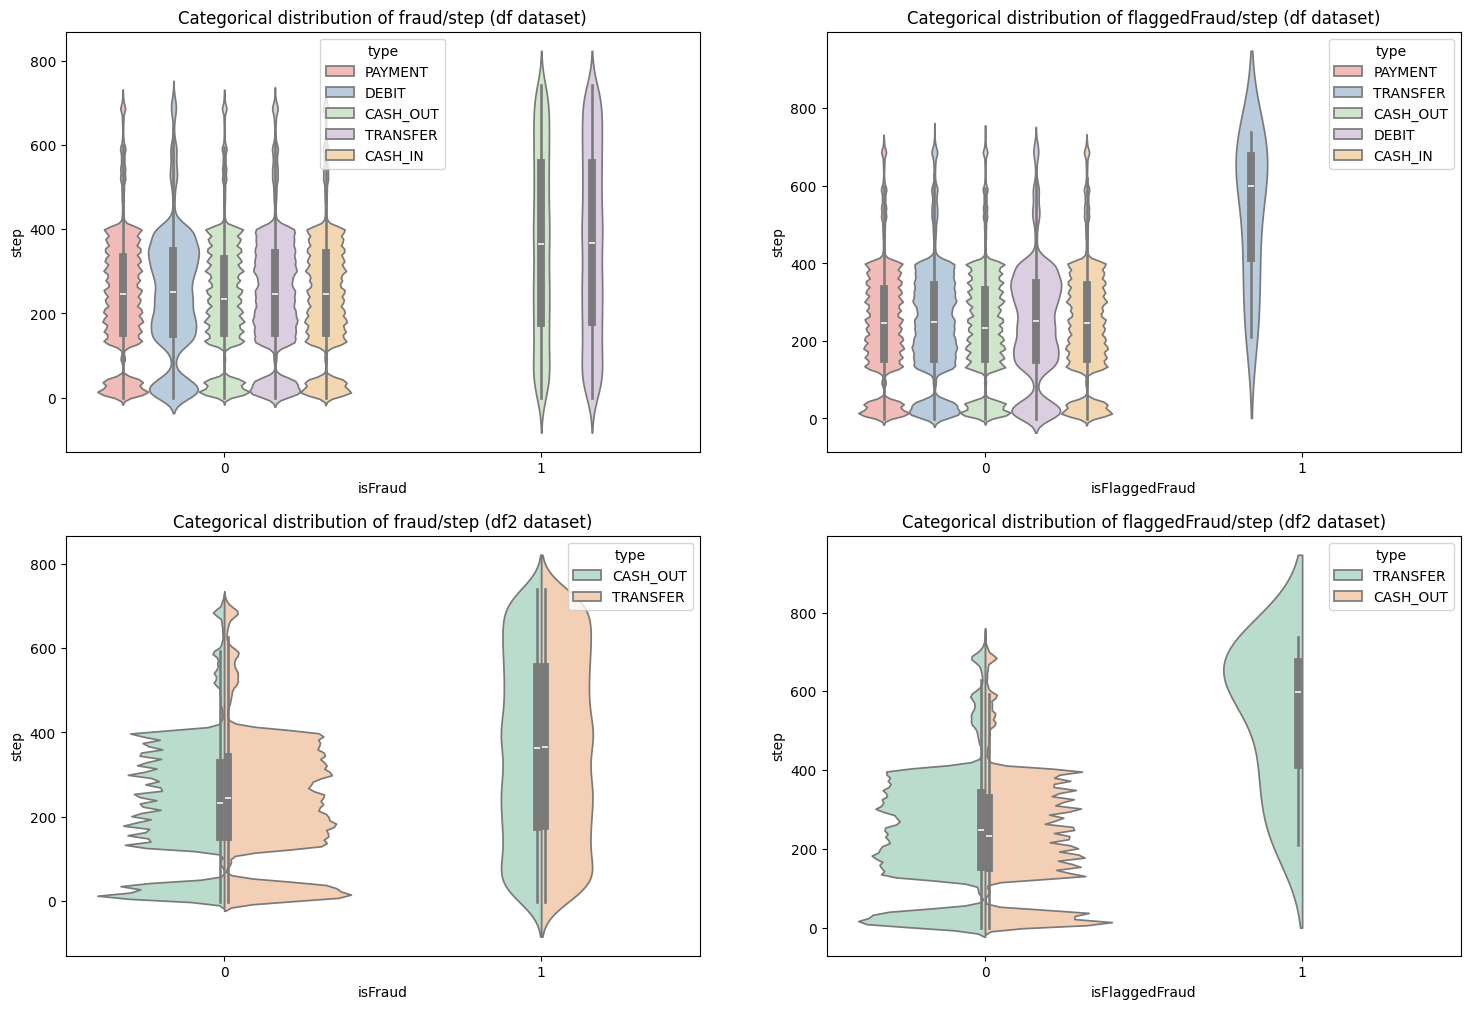

In [ ]:
plt.rcParams['figure.figsize'] =(18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of flaggedFraud/step (df2 dataset)')

plt.show()

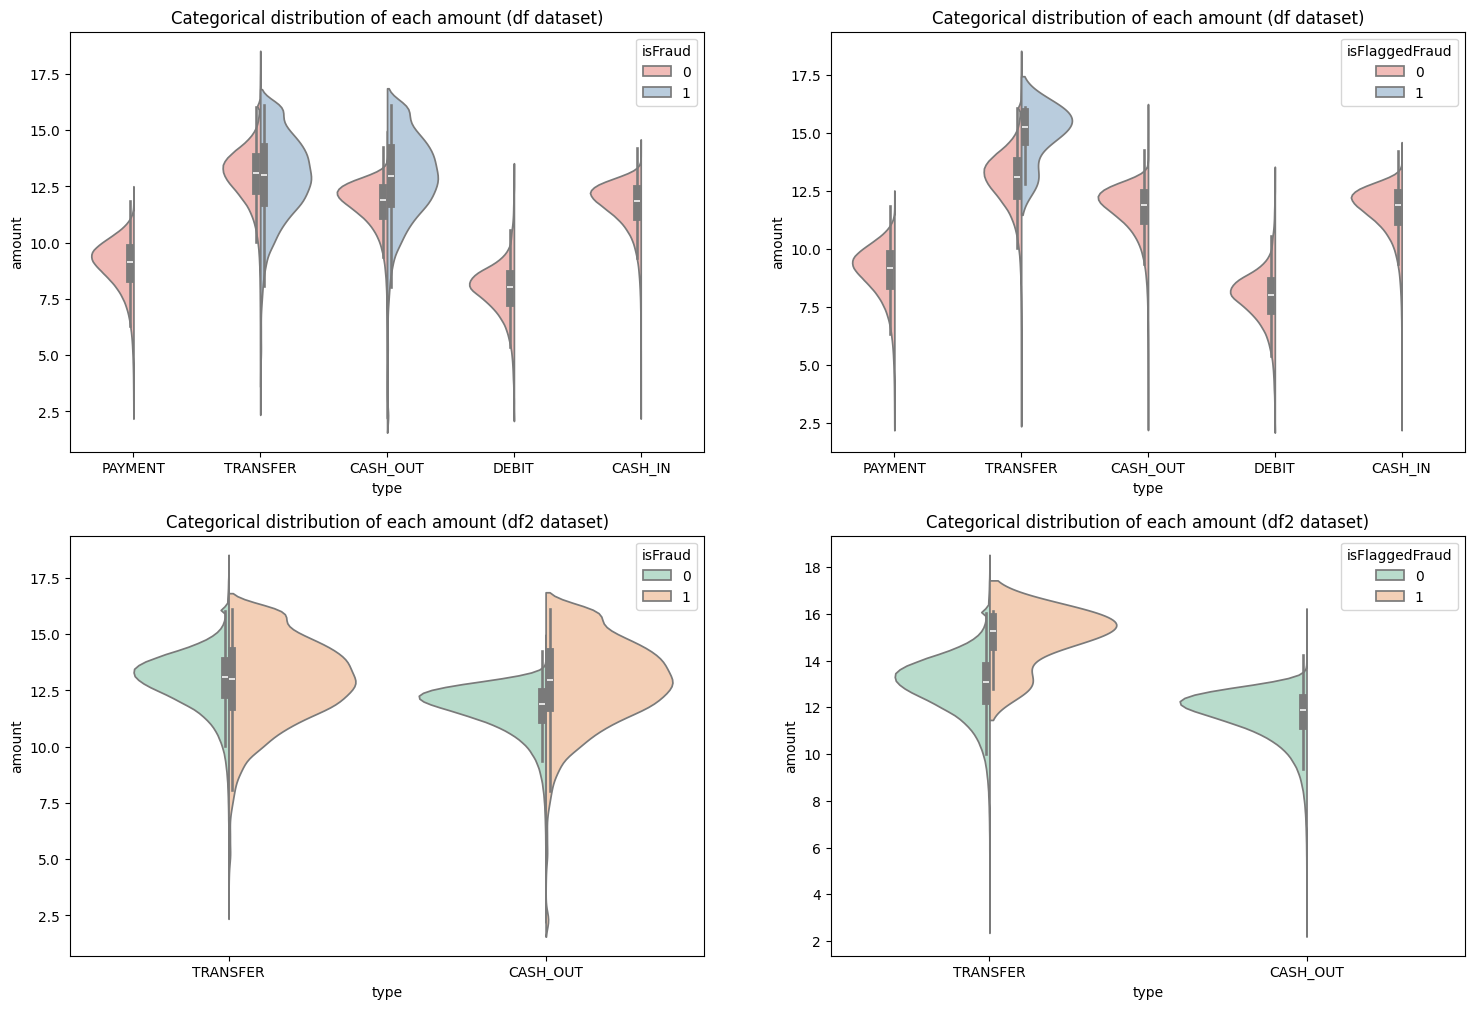

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.show()

### Feature engineering

oldbalance, newbalance and amount are interdependent variables. So, we can combine them into a single a variable.



In [ ]:
df['diffOrg']  = df['oldbalanceOrg']  - df['newbalanceOrig'] + df['amount']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest'] + df['amount']

df2['diffOrg']  = df2['oldbalanceOrg']  - df2['newbalanceOrig'] + df2['amount']
df2['diffDest'] = df2['oldbalanceDest'] - df2['newbalanceDest'] + df2['amount']

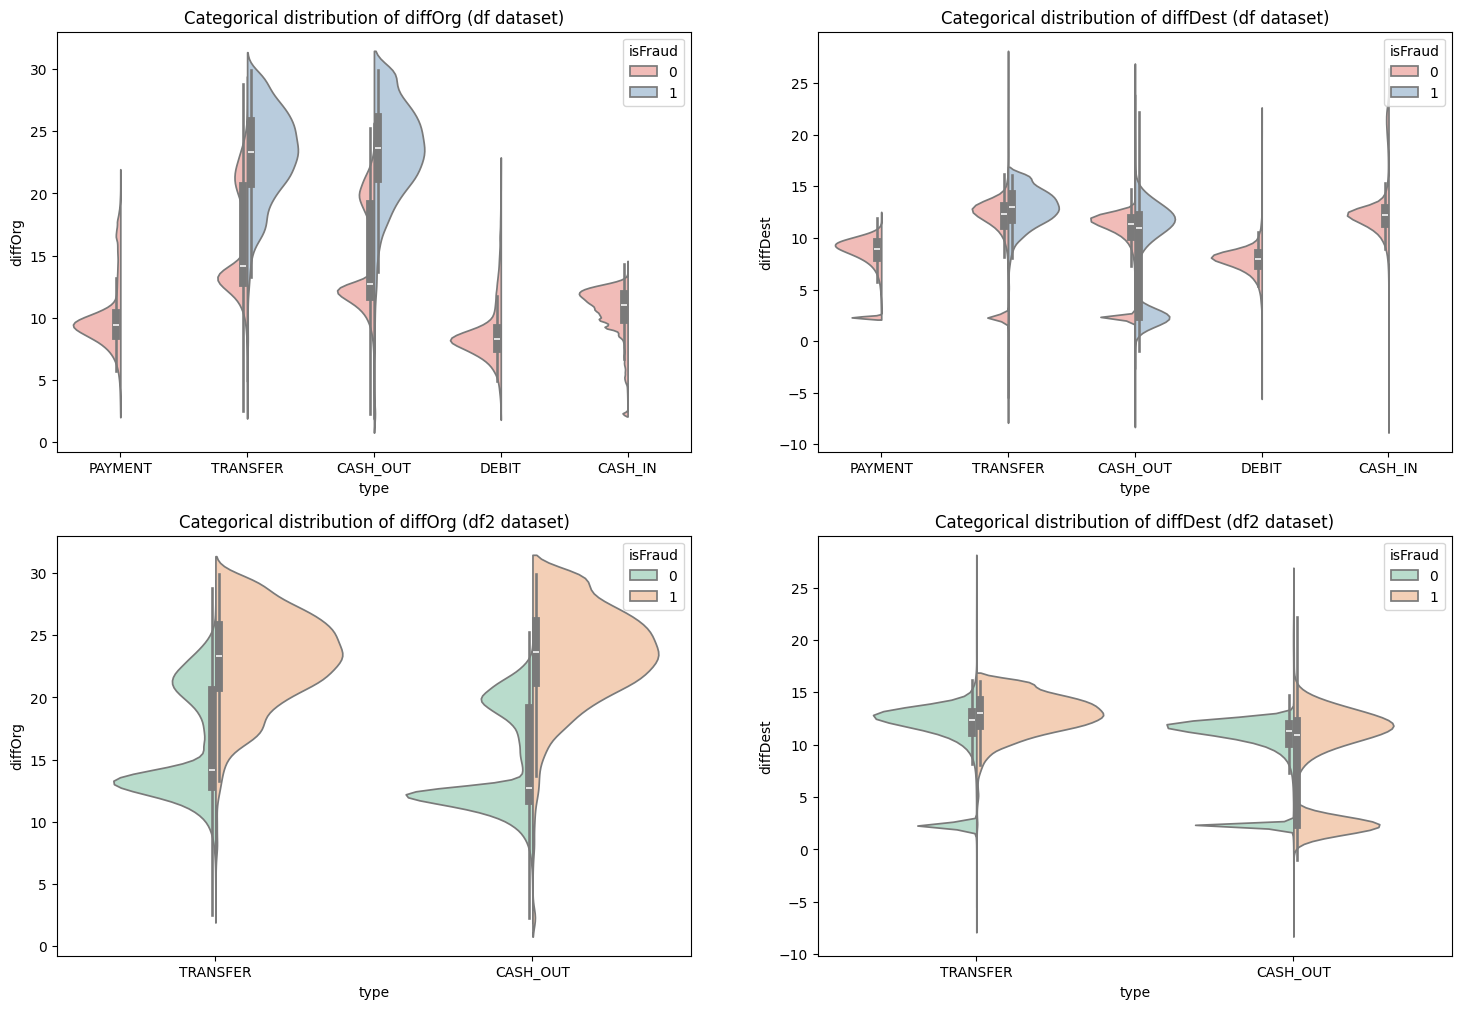

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()

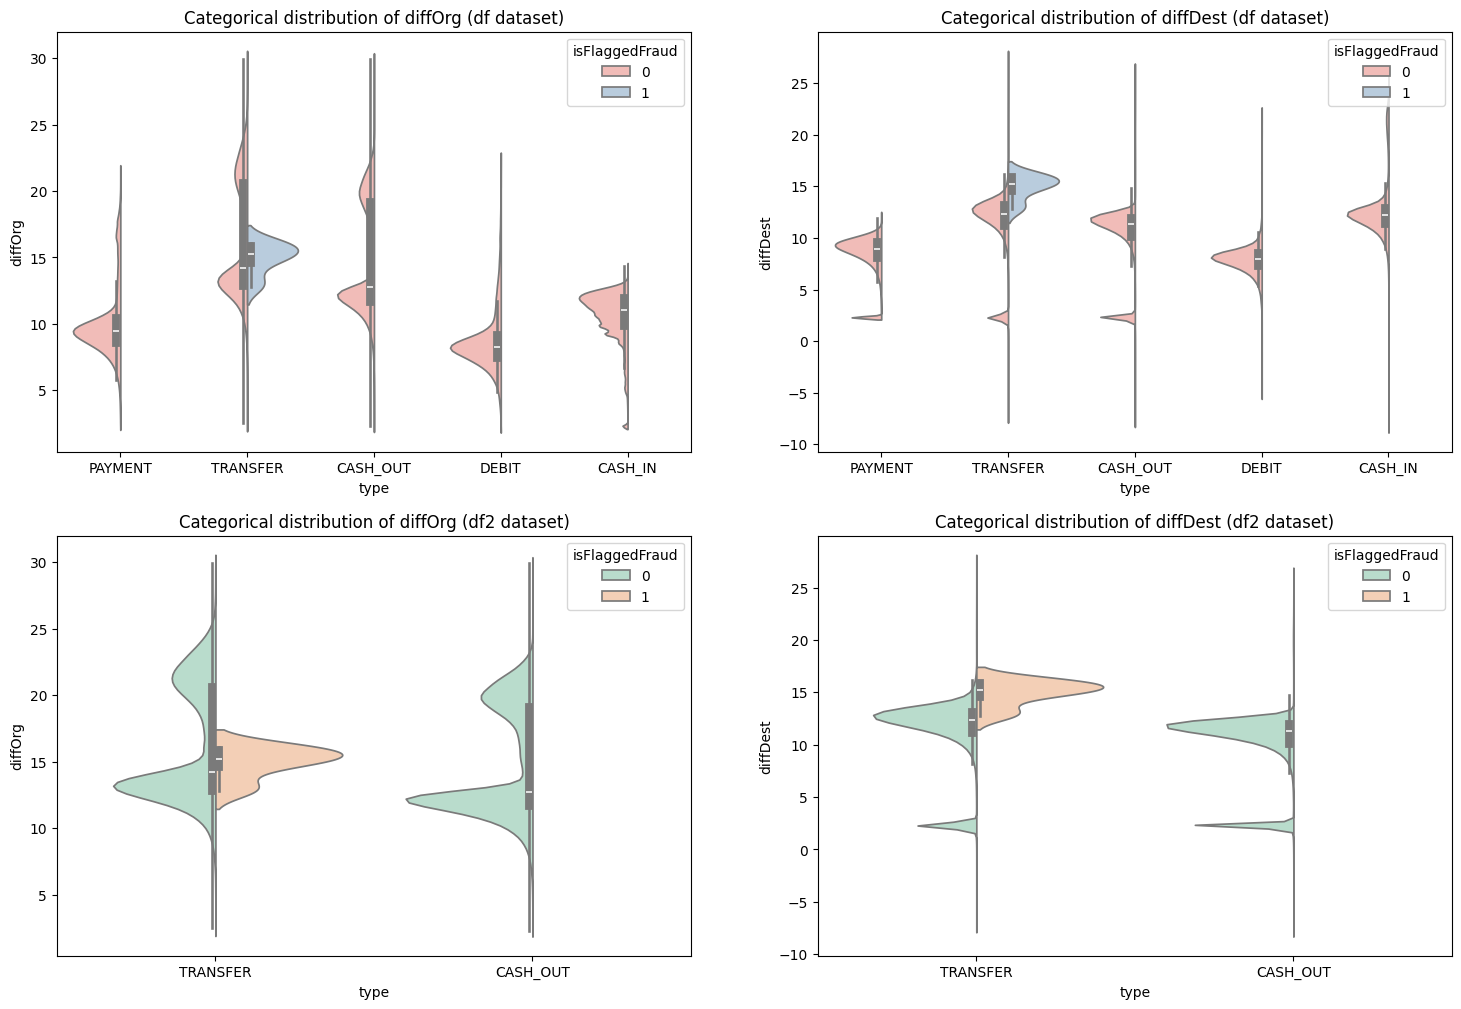

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()

### SMOTE oversampling for imbalanced data


In [ ]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')


Fraud ratio 
isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64 

Flagged fraud ratio 
isFlaggedFraud
0    0.999997
1    0.000003
Name: count, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE


Preparing datasets



In [ ]:
X = df
Y = df['isFraud']          # target label
X = pd.concat([X, pd.get_dummies(X['type'])], axis = 'columns')       # one-hot columns for transaction type
X = X.drop(['isFraud', 'type'], axis=1)

X2 = df2
Y2 = df2['isFraud']
X2 = pd.concat([X2, pd.get_dummies(X2['type'])], axis = 'columns')
X2 = X2.drop(['isFraud', 'type'], axis=1)

In [ ]:
len(X), len(X2)


(6362620, 2770409)

SMOTE resampling



In [ ]:
X, Y = SMOTE().fit_resample(X, Y)
X2, Y2 = SMOTE().fit_resample(X2, Y2)

In [ ]:
len(X), len(X2)


(12708814, 5524392)

In [ ]:
list(Y).count(1), list(Y2).count(1)


(6354407, 2762196)

In [ ]:
list(Y).count(0), list(Y2).count(0)


(6354407, 2762196)

### Model Training


### Train, validation and test Split


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
random_state = 55


In [ ]:
p = np.random.RandomState(seed=random_state).permutation(len(X))
p2 = np.random.RandomState(seed=random_state).permutation(len(X2))

In [ ]:
X, Y = X.iloc[p], Y.iloc[p]
X2, Y2 = X2.iloc[p2], Y2.iloc[p2]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = random_state)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = random_state)

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = random_state)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, test_size = 0.5, random_state = random_state)

In [ ]:
import gc


In [ ]:
del df, df2, df_missing, df_outliers, dff_outliers, X, Y, X2, Y2, cols


In [ ]:
gc.collect()


57734

### Training the classifier


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(tree_method = "gpu_hist", random_state=random_state)
model2 = XGBClassifier(tree_method = "gpu_hist", random_state=random_state)

In [ ]:
model.fit(x_train, y_train)
model2.fit(x2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:13:03] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [ ]:
gc.collect()

101

### Evaluation

Let's define a function that returns all evaluation metrics at once.



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score

def evaluate(trainedmodel, x, y):
  '''
    To evaluate model performance
  '''
  y_pred   = trainedmodel.predict(x)
  f1       = f1_score(y, y_pred)
  report   = classification_report(y, y_pred)
  acc      = accuracy_score(y, y_pred)
  roc_auc  = roc_auc_score(y, y_pred)

  eval = {'y_pred': y_pred,
          'f1_score': f1,
          'accuracy':acc,
          'roc_auc_score': roc_auc
          }

  return eval, report

In [ ]:
eval_train, report_train = evaluate(model, x_train, y_train)
eval_val, report_val = evaluate(model, x_val, y_val)

eval2_train, report2_train = evaluate(model2, x2_train, y2_train)
eval2_val, report2_val = evaluate(model2, x2_val, y2_val)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:16:24] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:17:48] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [ ]:
import pprint
pprint._sorted = lambda x:x

In [ ]:
print('Evaluation metrics on training data (for df): \n')
pprint.pprint(eval_train)
print('\n',report_train)

print('\n\nEvaluation metrics on val data (for df): \n')
pprint.pprint(eval_val)
print('\n', report_val)

Evaluation metrics on training data (for df): 

{'accuracy': 0.9986871315979432,
 'f1_score': 0.9986877695759554,
 'roc_auc_score': 0.9986871205484184,
 'y_pred': array([1, 1, 1, ..., 0, 0, 1])}

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083404
           1       1.00      1.00      1.00   5083647

    accuracy                           1.00  10167051
   macro avg       1.00      1.00      1.00  10167051
weighted avg       1.00      1.00      1.00  10167051



Evaluation metrics on val data (for df): 

{'accuracy': 0.9986277236027606,
 'f1_score': 0.9986288230206778,
 'roc_auc_score': 0.9986275739604884,
 'y_pred': array([0, 0, 1, ..., 0, 1, 0])}

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635253
           1       1.00      1.00      1.00    635628

    accuracy                           1.00   1270881
   macro avg       1.00      1.00      1.00   1270881
weighted a

In [ ]:
print('Evaluation metrics on training data (for df2): \n')
pprint.pprint(eval2_train)
print('\n', report2_train)

print('\n\nEvaluation metrics on val data (for df2): \n')
pprint.pprint(eval2_val)
print('\n', report2_val)

Evaluation metrics on training data (for df2): 

{'accuracy': 0.9979373292939743,
 'f1_score': 0.9979396020421356,
 'roc_auc_score': 0.9979372332725495,
 'y_pred': array([0, 1, 1, ..., 0, 1, 0])}

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209546
           1       1.00      1.00      1.00   2209967

    accuracy                           1.00   4419513
   macro avg       1.00      1.00      1.00   4419513
weighted avg       1.00      1.00      1.00   4419513



Evaluation metrics on val data (for df2): 

{'accuracy': 0.9978531566381085,
 'f1_score': 0.997857767309457,
 'roc_auc_score': 0.9978520032296211,
 'y_pred': array([0, 0, 1, ..., 1, 1, 1])}

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    275945
           1       1.00      1.00      1.00    276494

    accuracy                           1.00    552439
   macro avg       1.00      1.00      1.00    552439
weighted 

In [ ]:
gc.collect()


0

In [ ]:
eval_test, report_test = evaluate(model, x_test, y_test)
eval2_test, report2_test = evaluate(model2, x2_test, y2_test)

In [ ]:
print('Evaluation metrics on test data (for df): \n')
pprint.pprint(eval_test)
print('\n', report_test)

print('\n\nEvaluation metrics on test data (for df2): \n')
pprint.pprint(eval2_test)
print('\n', report2_test)

Evaluation metrics on test data (for df): 

{'accuracy': 0.998623003551864,
 'f1_score': 0.9986230837259511,
 'roc_auc_score': 0.9986232680056657,
 'y_pred': array([1, 0, 0, ..., 1, 1, 1])}

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635750
           1       1.00      1.00      1.00    635132

    accuracy                           1.00   1270882
   macro avg       1.00      1.00      1.00   1270882
weighted avg       1.00      1.00      1.00   1270882



Evaluation metrics on test data (for df2): 

{'accuracy': 0.9978966041561075,
 'f1_score': 0.9978951105700954,
 'roc_auc_score': 0.99789843476236,
 'y_pred': array([1, 0, 0, ..., 0, 1, 0])}

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    276705
           1       1.00      1.00      1.00    275735

    accuracy                           1.00    552440
   macro avg       1.00      1.00      1.00    552440
weighted avg   

In [ ]:
best = model


### Feature importances


In [ ]:
from xgboost import plot_importance


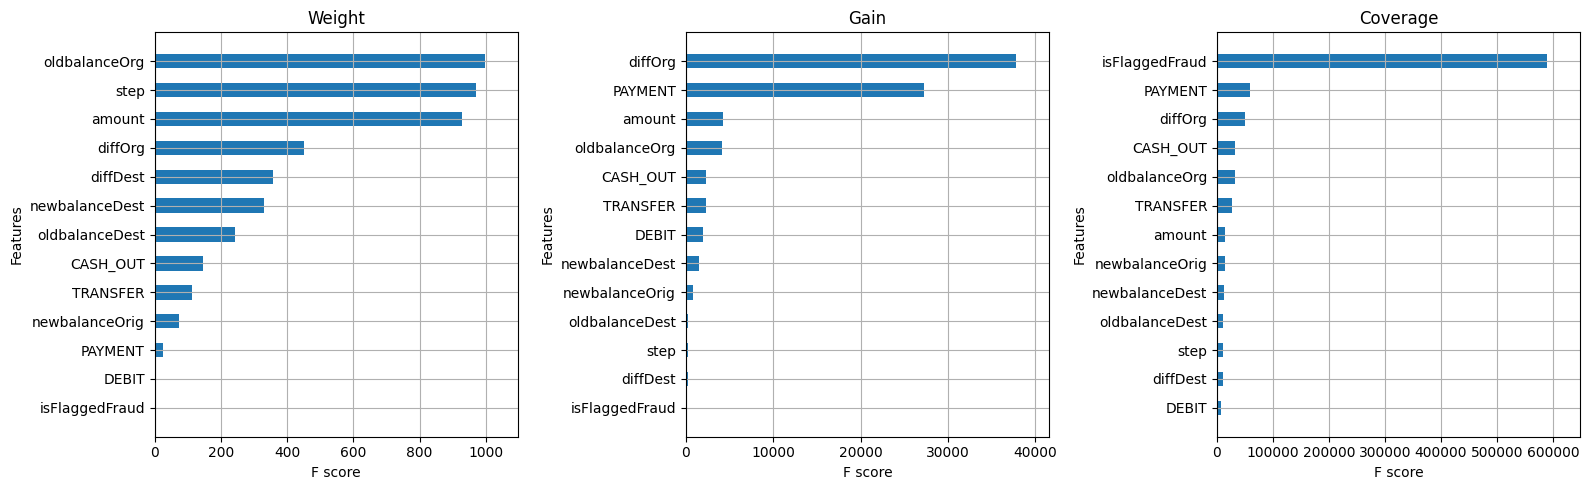

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

plot_importance(booster=best, importance_type='weight', title='Weight', show_values=False, height=0.5, ax = ax[0])

# plot importances with split mean gain
plot_importance(booster=best, importance_type='gain', title='Gain', show_values=False, height=0.5, ax = ax[1])

# plot importances with sample coverage
plot_importance( booster=best, importance_type='cover', title='Coverage', show_values=False, height=0.5, ax = ax[2])

plt.tight_layout()
plt.show()

From the plot, we can infer that

- diffOrg has the most gain, i.e. diffOrg contributed most towards model prediction. oldbalanceOrg, amount, and newbalanceDest follows.
This implies that he most important features are diffOrg, oldbalanceOrg, amount and newbalanceDest.
- As we look further down the gain plot, we find that PAYMENT contributed more than TRANSFER towards model prediction. This can be attributed towards much greater number of PAYMENT samples in the distribution (than TRANSFER). Also, TRANSFER and PAYMENT has very similar weights.
This result doesn't make sense because all PAYMENTs were non-fraud in the original dataset and did not contribute towards target label.
- The gain of CASH_IN over diffDest is also not very intuitive, because diffDest has more sample cover than CASH_IN and also has more weight. And CASH_IN is another feature that didn't contribute towards target label.
- Even with comparatively high weight for step, it has very less gain. This may be due to the fact that fraud transactions per category has an almost uniform distribution on step - yet, the result is quite unexpected.
- The feature isFlaggedFraud, although present in the dataset, seems to be completely ommitted. XGBoost algorithm might have ignored isFlaggedFraud because it had only very less number of positive examples.
- It seems justified that CASH_OUT has a low weight, because it has a comparatively high sample coverage, but requires only moderate gain for model prediction.

### Fraud prevention
- When updating the infrastructure for preventing fraud transactions, the company should lookout for anomalies in diffOrg.
-Detecting anomalies in a feature that combines oldbalanceOrg, amount and newbalanceDest, will also be useful for fraud prevention. E.g.

- Using a different criteria for flagging fraudulent transactions will also be useful.

After updating the infrastructure, we can retrain the model using new data and compare the model performances to determine whether the updates will be successful towards proactive fraud detection.